<a href="https://colab.research.google.com/github/FestinBiju/Employee-churn-prediction/blob/main/emp_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [9]:

import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the datasets
train_data_path = '/content/employee_data.csv'
unseen_data_path = '/content/unseen_employee_data.csv'

df = pd.read_csv(train_data_path)
unseen_df = pd.read_csv(unseen_data_path)

# Display the first few rows of the training dataset
print(df.head())

# Display the first few rows of the unseen dataset
print(unseen_df.head())


   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  
   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              228  management              NaN        

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import category_encoders as ce

# Display the first few rows of the datasets to understand their structure
print(df.head())
print(unseen_df.head())

# Initialize OrdinalEncoder
encoder = ce.OrdinalEncoder(handle_unknown='impute')

# Encode categorical features
categorical_features = ['department', 'salary', 'recently_promoted', 'filed_complaint']
df[categorical_features] = encoder.fit_transform(df[categorical_features])
unseen_df[categorical_features] = encoder.transform(unseen_df[categorical_features])

# Encode target variable
target_encoder = ce.OrdinalEncoder()
df['status'] = target_encoder.fit_transform(df['status'])

# Split the data into features and target
X = df.drop('status', axis=1)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocess the unseen data
unseen_df_imputed = imputer.transform(unseen_df)
unseen_df_scaled = scaler.transform(unseen_df_imputed)


   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              221           1              NaN         0.932868           4   
1              232           2              NaN              NaN           3   
2              184           3              NaN         0.788830           3   
3              206           3              NaN         0.575688           4   
4              249           3              NaN         0.845217           3   

   recently_promoted  salary  satisfaction  status  tenure  
0                NaN       1      0.829896       1     5.0  
1                NaN       1      0.834544       2     2.0  
2                NaN       2      0.834988       2     3.0  
3                NaN       1      0.424764       2     2.0  
4                NaN       1      0.779043       2     3.0  
   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              228          10              NaN         0.735618         

Accuracy: 0.98
              precision    recall  f1-score   support

           1       0.98      0.95      0.97       661
           2       0.99      0.99      0.99      2189

    accuracy                           0.98      2850
   macro avg       0.98      0.97      0.98      2850
weighted avg       0.98      0.98      0.98      2850



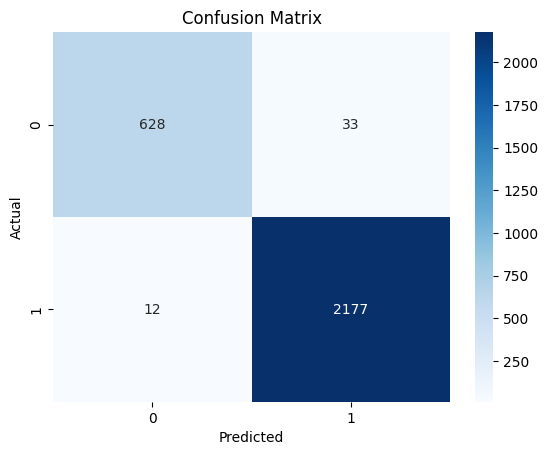

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Make predictions on the unseen data
unseen_predictions = rf.predict(unseen_df_scaled)

# Add predictions to the unseen dataframe
unseen_df['Attrition_Prediction'] = target_encoder.inverse_transform(unseen_predictions)

# Display the first few rows with predictions
print(unseen_df.head())


   avg_monthly_hrs  department  filed_complaint  last_evaluation  n_projects  \
0              228          10              NaN         0.735618           2   
1              229           5              NaN         1.000000           4   
2              196           3              1.0         0.557426           4   
3              207           4              NaN         0.715171           3   
4              129          10              NaN         0.484818           2   

   recently_promoted  salary  satisfaction  tenure  Attrition_Prediction  
0                NaN       3      0.805661     3.0                     2  
1                NaN       1      0.719961     4.0                     2  
2                NaN       1      0.749835     2.0                     2  
3                NaN       3      0.987447     3.0                     2  
4                NaN       1      0.441219     3.0                     1  
